<IPython.core.display.Javascript object>


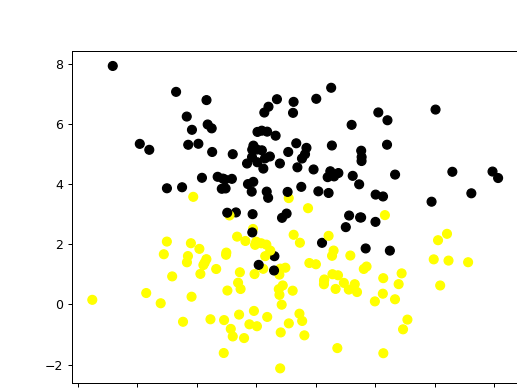

Logistic regression classifier 
  {'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Accuracy of LR classifier on training set: 0.95
Accuracy of LR classifier on test set: 0.90


In [19]:
#Использовать исскуственно сгенерированный набор данных, построить классификатор на базе алгоритма логистической регресии

%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np 
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

#генерируем набор данных, состоящий из 200 объектов разделенных на 2 класс
X_D2, y_D2 = make_blobs(n_samples = 200, n_features = 2, centers = 2,
                        cluster_std = 1.3, random_state = 4)

#благодаря этим трем строкам, мы генерируем визуализацию данных
plt.figure()
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, marker= 'o', s=50, cmap=cmap_bold)
plt.show()

#получаем тестовые и тренировочные значения
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                    random_state = 0)
#создаем классификатор, который мы тренируем тренировочными множествами
clf = LogisticRegression(C=1, solver='lbfgs')
clf.fit(X_train, y_train)

#вычисляем результат классификатора
predictions = clf.predict(X_test)

#расчет параметра классификатора
print('Logistic regression classifier \n ', clf.get_params())

#оценка качества классификатора на тренировочных множетствах
print('Accuracy of LR classifier on training set: {:.2f}'
 .format(clf.score(X_train, y_train)))
#оценка качества классификатора на тестовых множествах
print('Accuracy of LR classifier on test set: {:.2f}'
 .format(clf.score(X_test, y_test)))

<IPython.core.display.Javascript object>


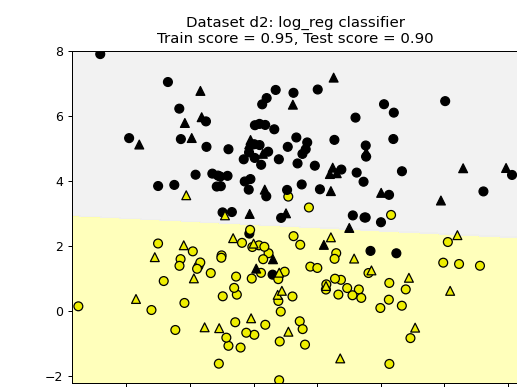

In [5]:
#библиотека для визуализации классов и раздеоляющих их границ
from adspy_shared_utilities import plot_class_regions_for_classifier

#классификация объектов, которая обладает только двумя признаками для наглядного представления
plot_class_regions_for_classifier(clf, X_train, y_train, X_test, y_test,
                                  'Dataset d2: log_reg classifier')


In [6]:
#Основная задача данной задачи определить полноценную оценку классификатора - параметры точности, полноты и гармонической меры

#библиотека для определения матрицы ошибок классификатора, которая определяет насколько классификатор путает объекты разных классов
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.semi_supervised import LabelSpreading

In [11]:
#здесь мы оцениваем результат работы классификатора для вывода матрицы ошибок, используя тестовые множества и результат классификатора
cm = confusion_matrix(y_test, predictions)
print(cm)

#здесь мы создает отчет, который показывает основые показатели классификатора, используя тестовые множества
report = classification_report(y_test, predictions)
print(report)


#выводит отчет, который показывает основые показатели классификатора, используя тренировочные множества и результат классификатора исходя из тренировочных множеств
print(classification_report(y_train,clf.predict(X_train)))

[[22  2]
 [ 3 23]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       0.92      0.88      0.90        26

    accuracy                           0.90        50
   macro avg       0.90      0.90      0.90        50
weighted avg       0.90      0.90      0.90        50

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        76
           1       0.96      0.95      0.95        74

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [51]:
#при помощи библиотеки pandas мы выгружаем в таблцу набор данных iris, который содержит 150 строк данных о цветах ирис разбитых на 3 класса, каждый цветок описывает 4 параметра
#при помощи describe выводим описание набора данных
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
dataset = pd.read_csv('iris.csv')
dataset.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [1]:
#iloc используем для нахождени набора данных из конткретных строк или столбцов
X = dataset.iloc[:, [0,1,2, 3]].values
y = dataset.iloc[:, 4].values

#здесь мы просто создаем тестовые и тренировочные множества
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#здесь мы создаем переменную, которая отвечает за стандартизация данных и преобразуем эти данные и стандартизируем
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#создаем сам классфикатор, который мы тренируем тренировочными множествами
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

#прогнозируем результаты тестовых множеств
y_pred = classifier.predict(X_test)

NameError: name 'dataset' is not defined

In [31]:
#выводим матрицу ошибок, исходя из тестовых множествх и прогнозируемых результатов
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [24]:
#выводим оценку качества классификатора тренировочных и тестовых множеств
('Accuracy of LR classifier on training set: {:.2f}'
 .format(classifier.score(X_train, y_train)))
print('Accuracy of LR classifier on test set: {:.2f}'
 .format(classifier.score(X_test, y_test)))

Accuracy of LR classifier on training set: 0.97
Accuracy of LR classifier on test set: 0.97


In [41]:
#выводит матрицу ошибок, которая показывает результат тренировочных множеств классификатора
print(confusion_matrix(classifier.predict(X_train), y_train))
#выводит отчета на основе тренировочных и результатов тренировочных множеств классификатора
print(classification_report(y_train,classifier.predict(X_train)))
#выводит отчет на основе тестовых и прогнозируемых результатов тестовых множеств
print(classification_report(y_test,y_pred))

[[37  0  0]
 [ 0 32  1]
 [ 0  2 40]]
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        37
  Versicolor       0.97      0.94      0.96        34
   Virginica       0.95      0.98      0.96        41

    accuracy                           0.97       112
   macro avg       0.97      0.97      0.97       112
weighted avg       0.97      0.97      0.97       112

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        13
  Versicolor       1.00      0.94      0.97        16
   Virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



<IPython.core.display.Javascript object>


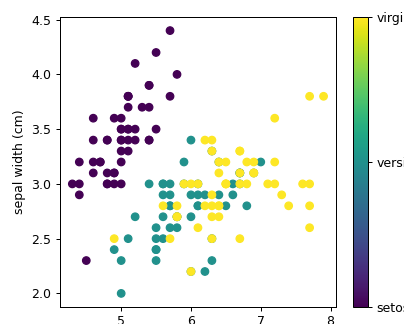

In [55]:
#загружаем набор данных цветов
iris = datasets.load_iris()

#индексы объектов, которые мы строим
x_index = 0
y_index = 1

#форматтер, который будет цветовую панель правильными целевыми именами
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()
